In [2]:
!nvidia-smi

Tue Jun 18 04:54:40 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [5]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Sgpyl7TKQKKd7Z0Gx6lq")
project = rf.workspace("gayal-c-kwimf").project("vial-83dtq")
version = project.version(3)
dataset = version.download("yolov8")



/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.10.0.82
    Uninstalling opencv-python-headless-4.10.0.82:
      Successfully uninstalled opencv-python-headless-4.10.0.82
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
 

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Vial-and-Syringe-Counting-7 in yolov8:: 100%|██████████| 388/388 [00:00<00:00, 2120.72it/s]


## Custom Training

In [12]:
%cd {HOME}

#!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True


!yolo task=detect mode=train model=yolov8l.pt data={dataset.location}/data.yaml epochs=20 imgsz=800 batch=4 plots=True


/content
New https://pypi.org/project/ultralytics/8.2.35 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/datasets/Vial-and-Syringe-Counting-7/data.yaml, epochs=20, patience=50, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None

In [ ]:
# Define the path where the model is saved in Google Drive
drive_model_path = '/content/drive/MyDrive/yolov9_weights/best.pt'
local_model_path = f'{HOME}/yolov9/runs/train/exp/weights/best.pt'

# Copy the model from Google Drive to the local path
shutil.copy(drive_model_path, local_model_path)
print(f"Model retrieved from {drive_model_path} to {local_model_path}")

In [14]:
!ls {HOME}/runs/detect/train4/

args.yaml					    PR_curve.png	train_batch421.jpg
confusion_matrix_normalized.png			    R_curve.png		train_batch422.jpg
confusion_matrix.png				    results.csv		val_batch0_labels.jpg
events.out.tfevents.1718687770.3cd7e9521de4.7064.0  results.png		val_batch0_pred.jpg
F1_curve.png					    train_batch0.jpg	val_batch1_labels.jpg
labels_correlogram.jpg				    train_batch1.jpg	val_batch1_pred.jpg
labels.jpg					    train_batch2.jpg	weights
P_curve.png					    train_batch420.jpg


/content


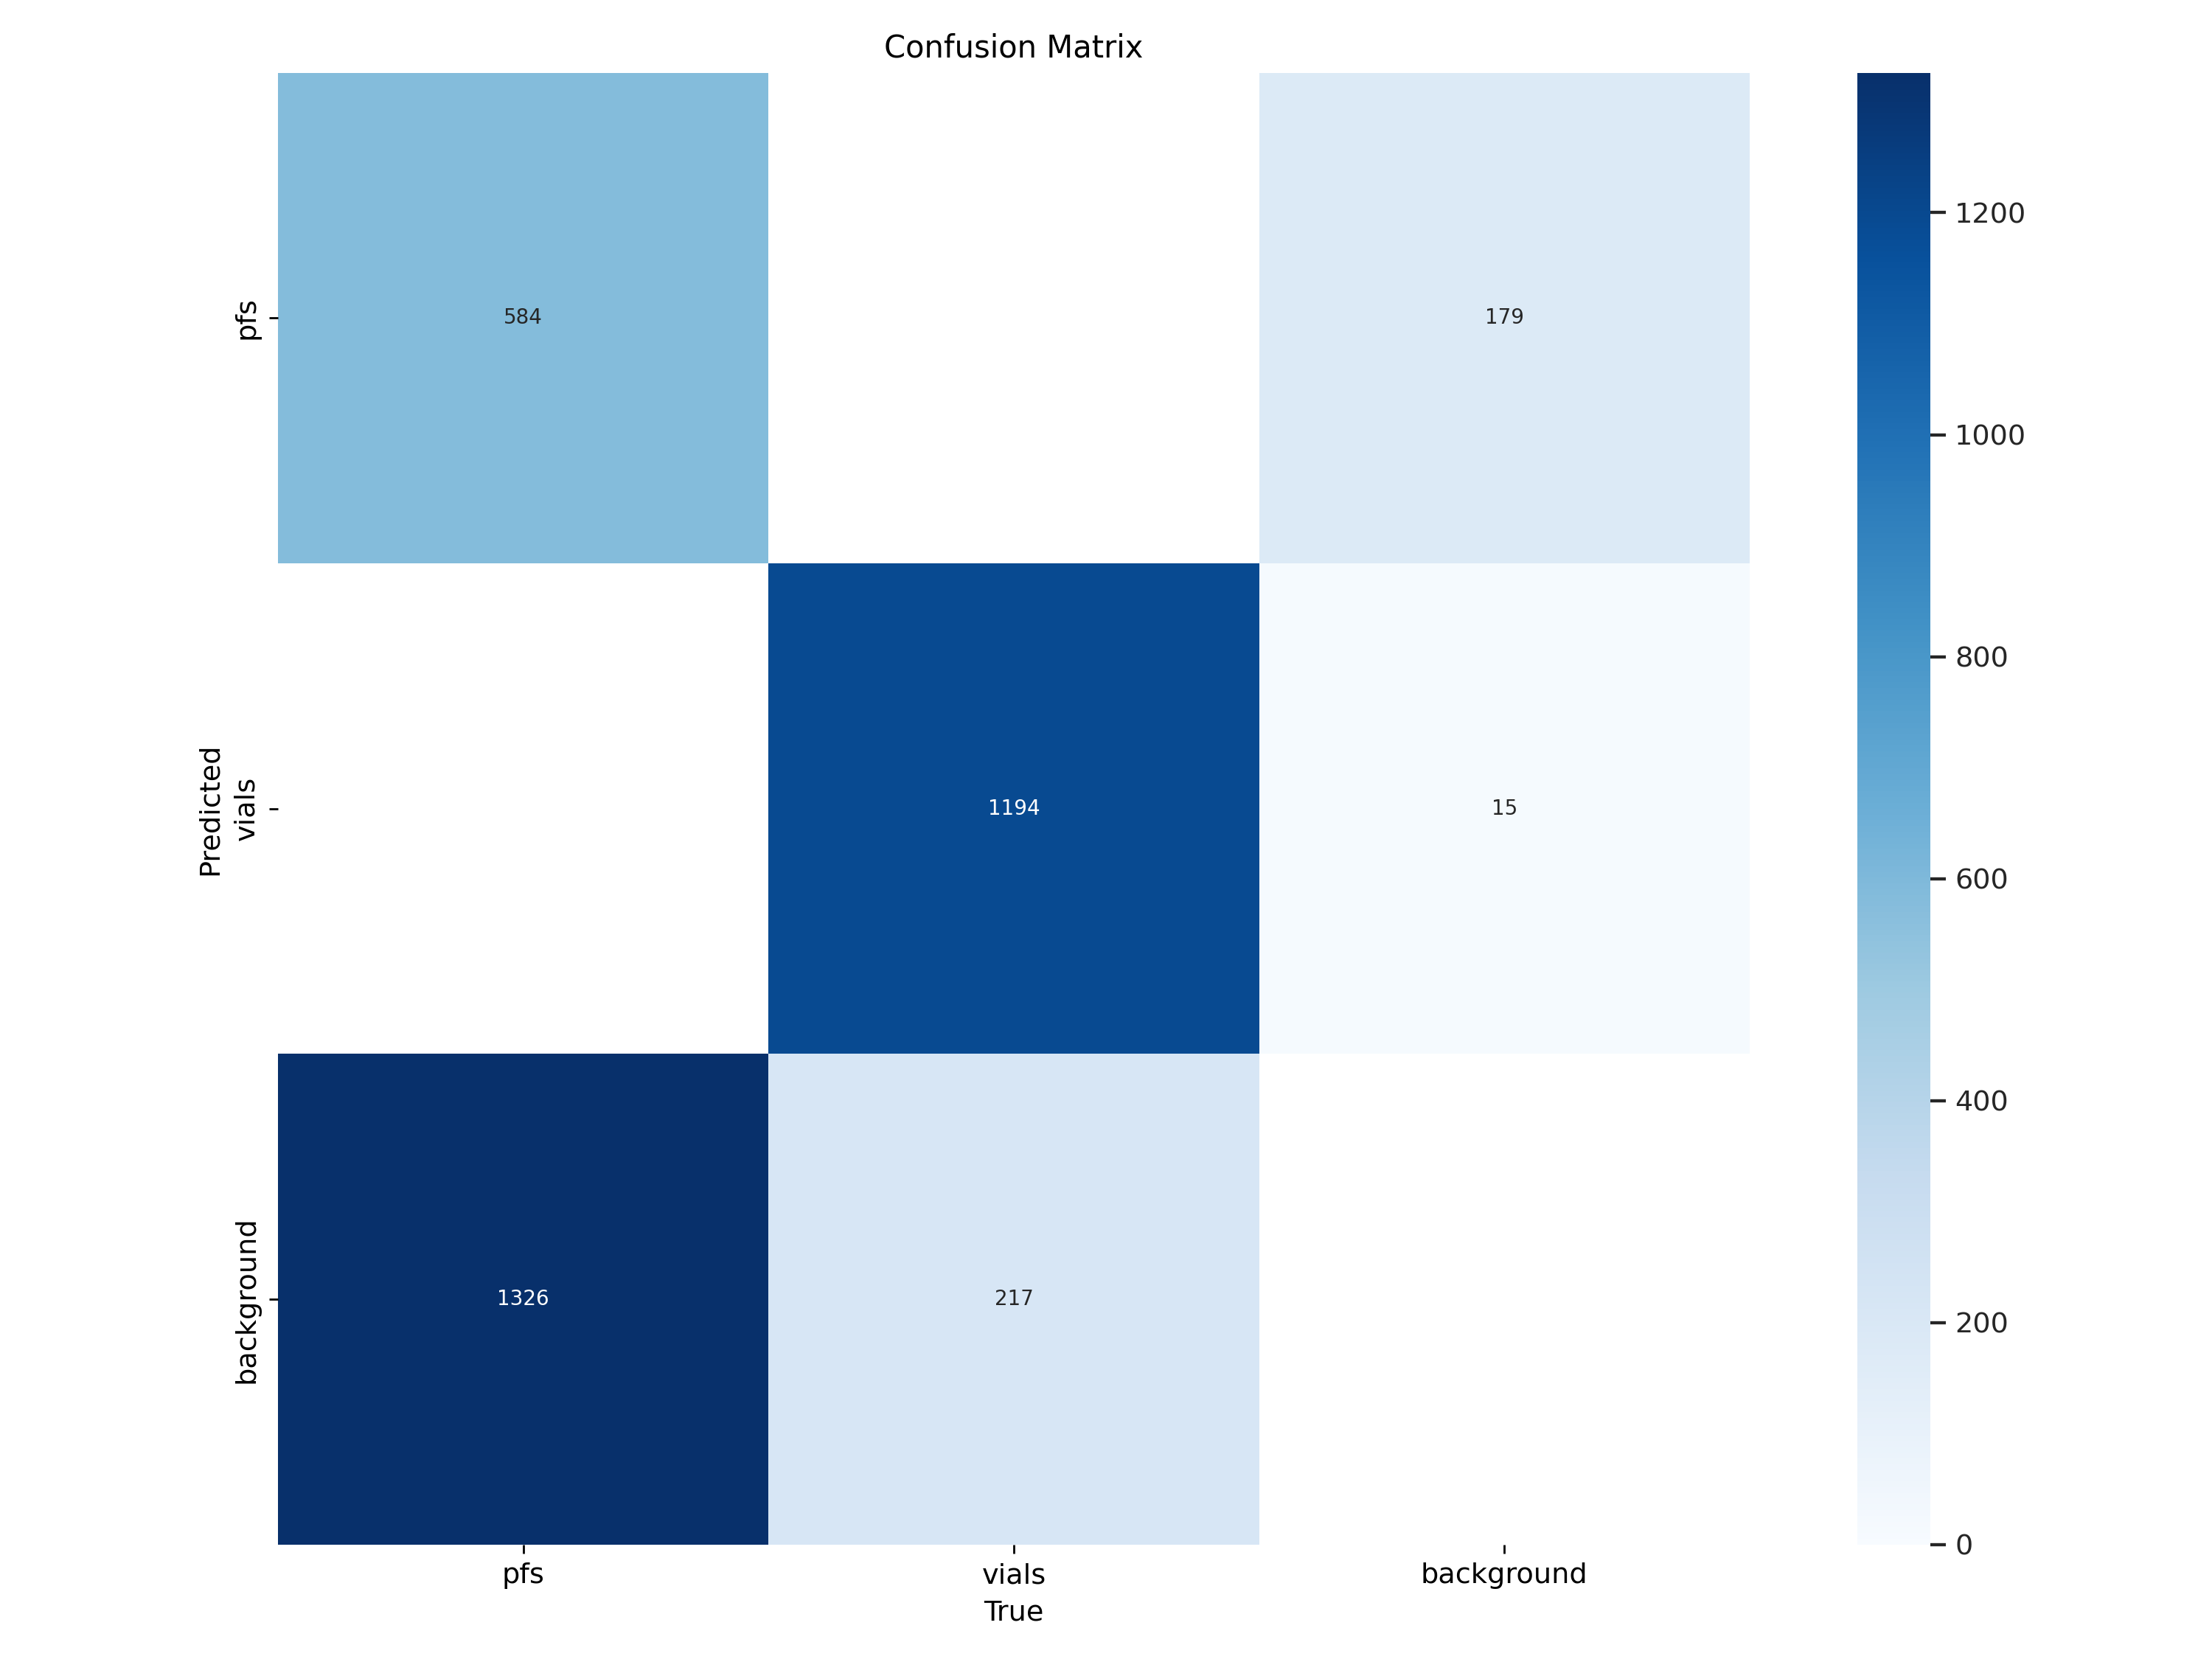

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content


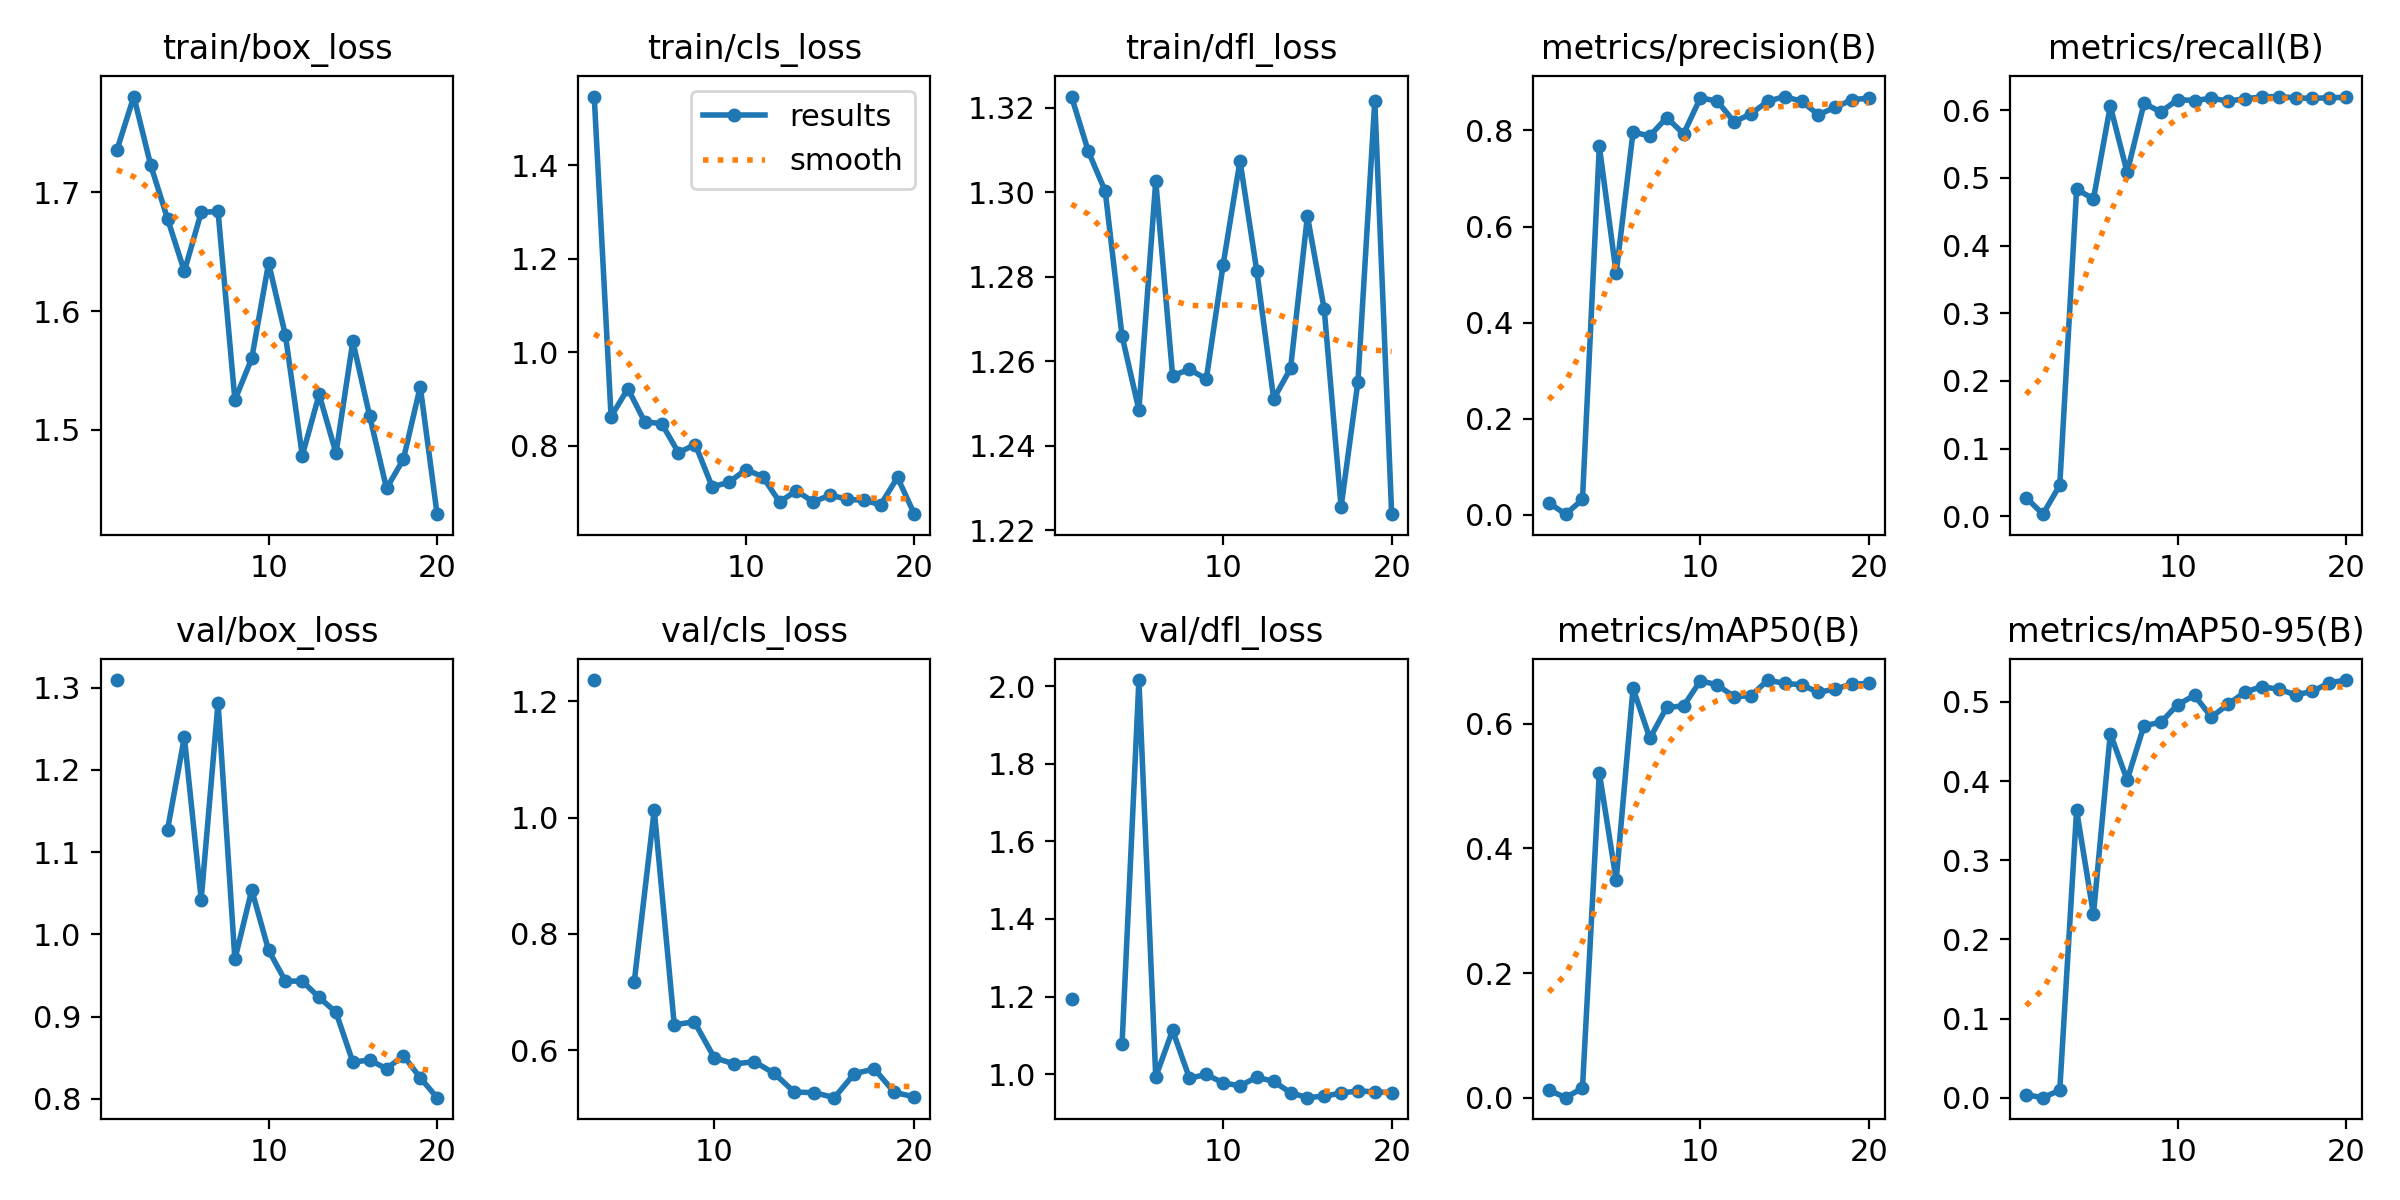

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content


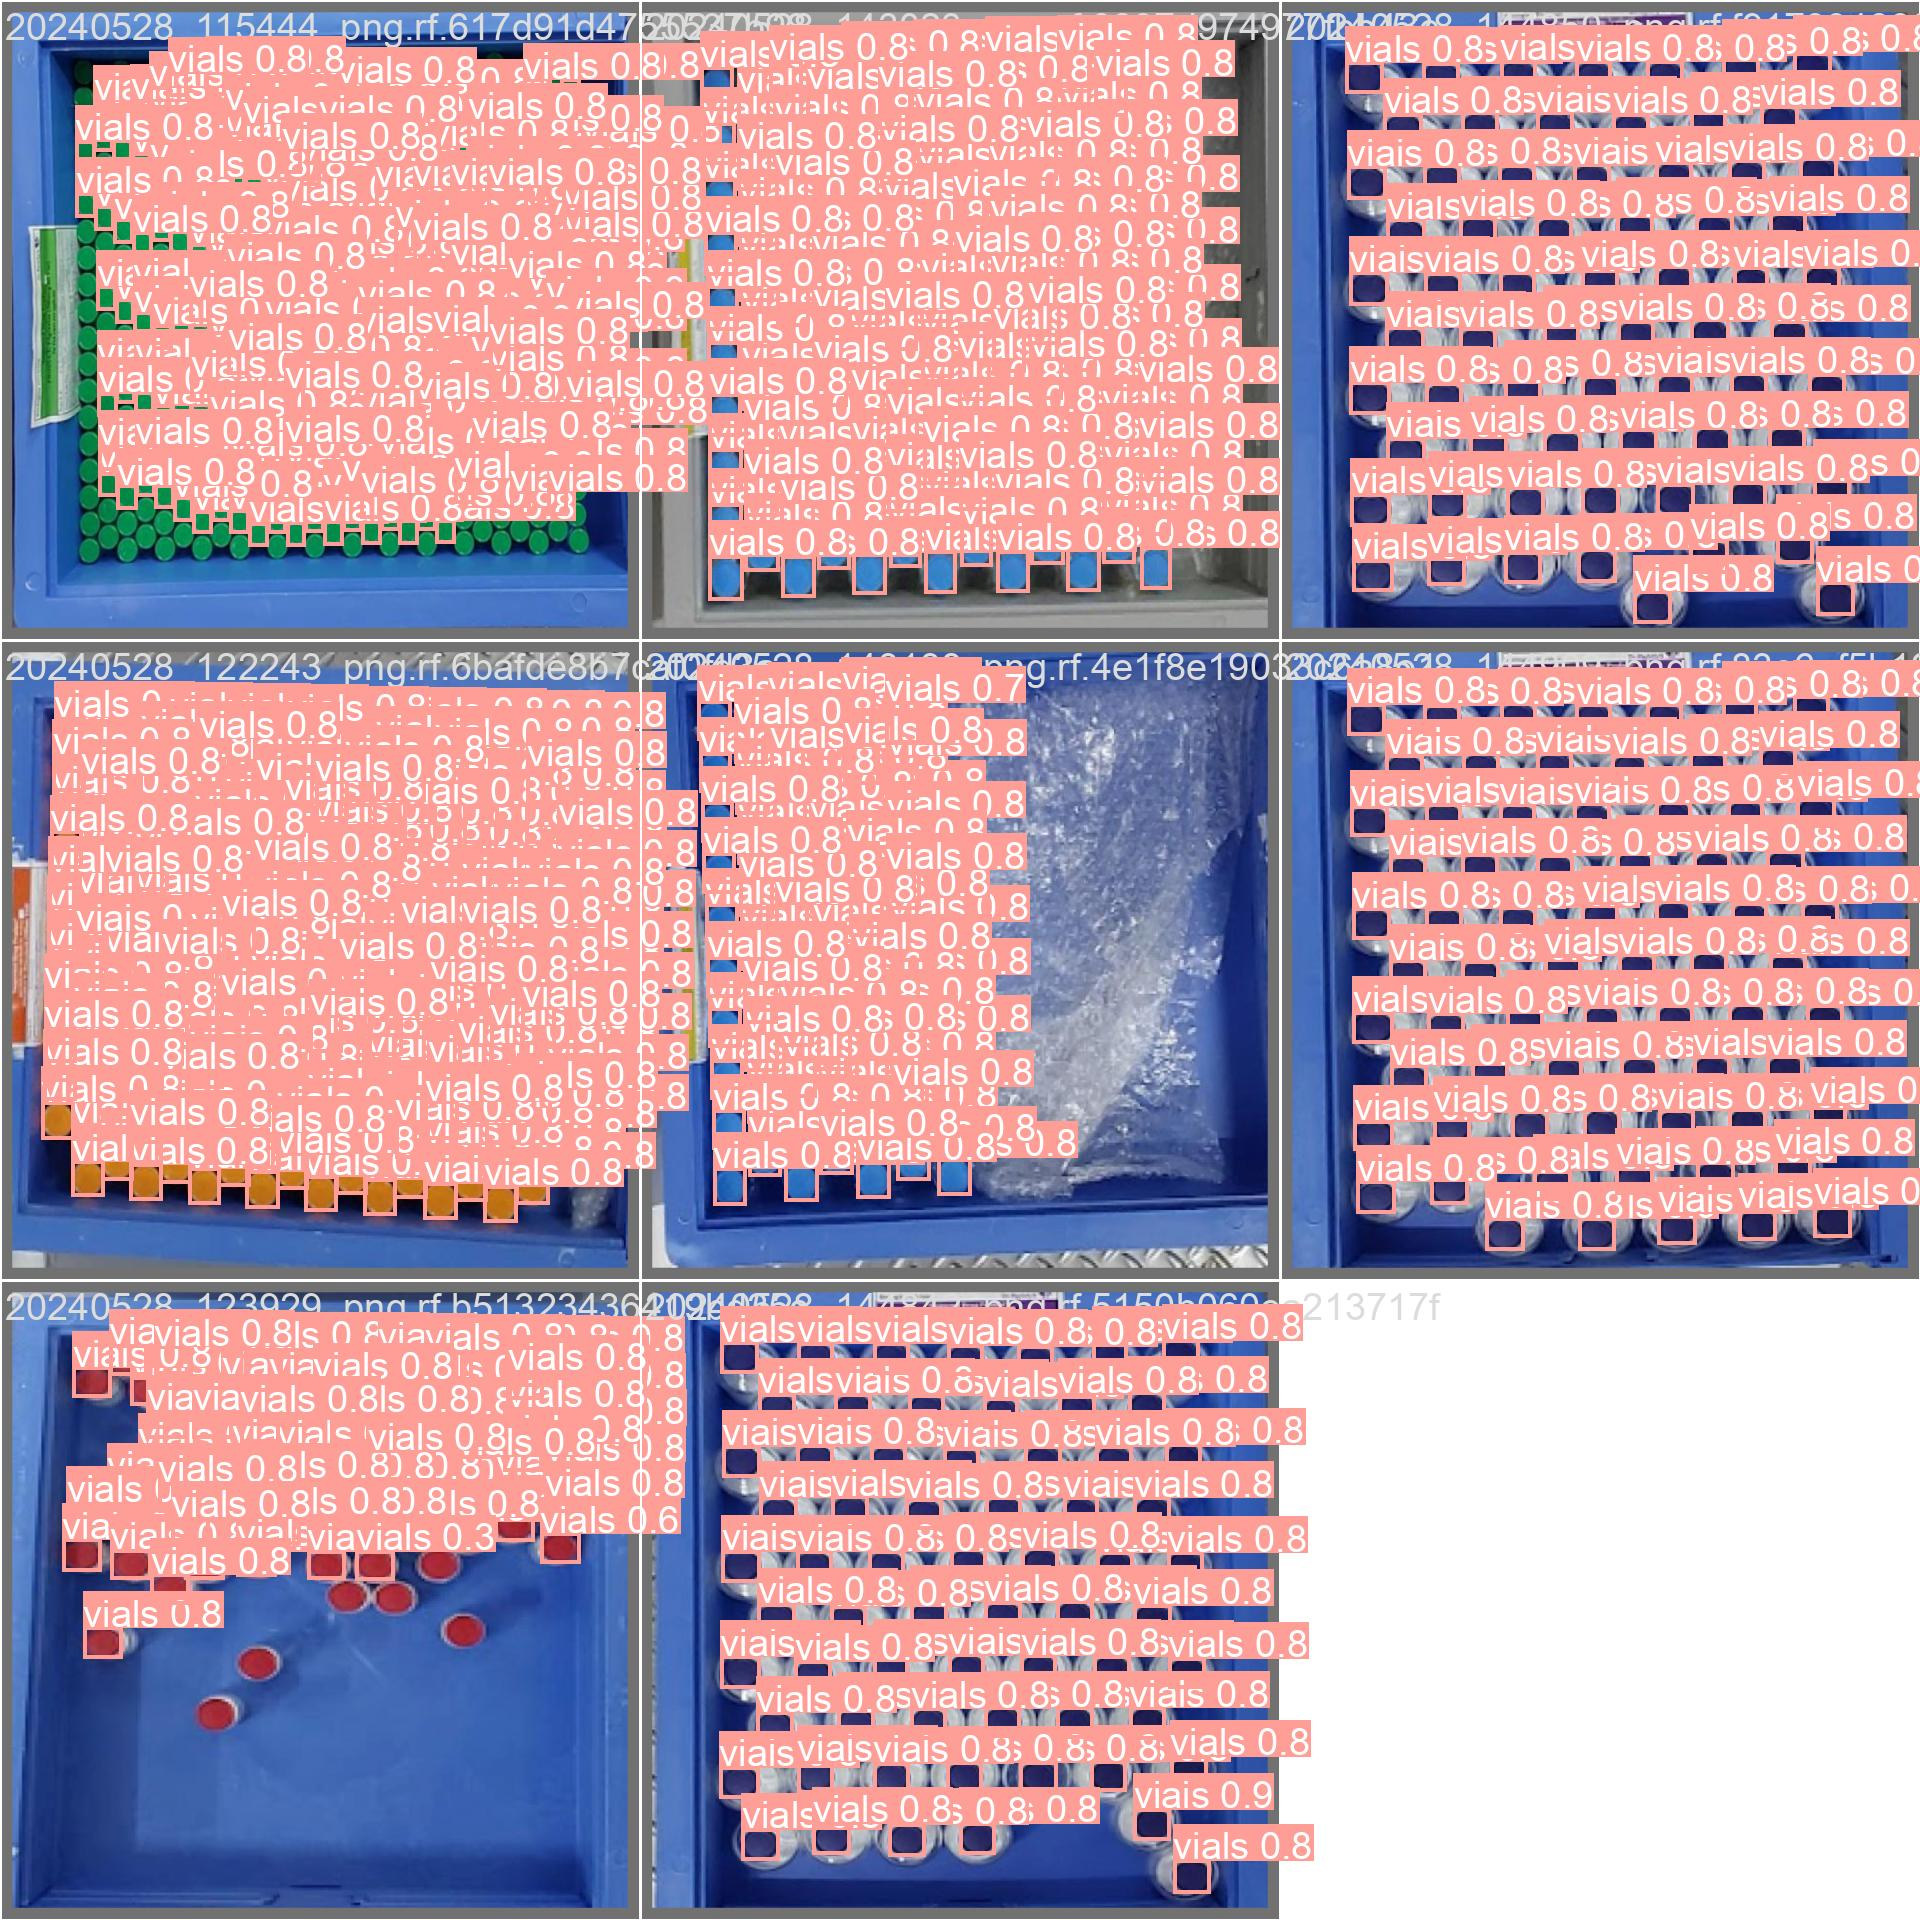

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [19]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/datasets/Vial-and-Syringe-Counting-7/valid/labels.cache... 15 images, 0 backgrounds, 0 corrupt: 100% 15/15 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3027, len(boxes) = 3321. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:03<00:00,  3.03s/it]
                   all         15       3321      0.866      0.619      0.664      0.531
                   pfs         15       1910      0.744      0.391       0.42      0.234
                 vials         15       1411      0.987      0.847      0.909      0.828
Speed: 0.

## Inference with Custom Model

In [20]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608150 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/8 /content/datasets/Vial-and-Syringe-Counting-7/test/images/20240528_115456_png.rf.3d61b6f99d660681d7787f715982cedb.jpg: 800x800 300 vialss, 81.0ms
image 2/8 /content/datasets/Vial-and-Syringe-Counting-7/test/images/20240528_122117_png.rf.7446081c8fc4ad9f30717d9667e52c41.jpg: 800x800 218 vialss, 79.8ms
image 3/8 /content/datasets/Vial-and-Syringe-Counting-7/test/images/20240528_122258_png.rf.93a140911feb17a2a3ec0a5852c5d6e1.jpg: 800x800 1 pfs, 208 vialss, 78.5ms
image 4/8 /content/datasets/Vial-and-Syringe-Counting-7/test/images/20240528_122311_png.rf.df520168ea49cf59d45aa0459ecd5a94.jpg: 800x800 211 vialss, 77.4ms
image 5/8 /content/datasets/Vial-and-Syringe-Counting-7/test/images/20240528_143247_png.rf.ef2b30ddfbfe94221129fdfa851452bc.jpg: 800x800 126 vialss

**NOTE:** Let's take a look at few results.

In [22]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/train_batch422.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [23]:
from google.colab import files

# Define the path to the file you want to download
file_path = '/content/runs/detect/train4/weights/best.pt'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
from google.colab import drive
import shutil
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define paths
trained_model_path = '/content/runs/detect/train4/weights/best.pt'
drive_save_path = '/content/drive/MyDrive/yolov9_weights/best.pt'

# Ensure the target directory exists
os.makedirs(os.path.dirname(drive_save_path), exist_ok=True)

# Copy the trained model to Google Drive
shutil.copy(trained_model_path, drive_save_path)
print(f"Model saved to {drive_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/yolov9_weights/best.pt


In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
